DECISION TREE CLASSIFIER

`Libraries`

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold

from sklearn.tree import DecisionTreeClassifier, export_text

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

`Load Dataset`

In [5]:
dataset = pd.read_csv('teleco_customer_churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


`Analisa Data`

In [6]:
#Informasi Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`PREPROCESSING DATA`

In [7]:
#Menghapus fitur yang tidak digunakan
dataset.drop('customerID', axis = 1, inplace = True)

Dari `script dataset.info()` diperoleh informasi kesalahan type data pada fitur `Senior Citizen`, `Total Charges`. `Senior Citizen` merupakan fitur categorikal, namun memiliki type data `integer`, sedangkan `Total Charges` merupakan fitur numerik, namun memiliki type data `object`.

In [8]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(str)

Dalam fitur `Total Charges` terdapat nilai kosong berupa string, sehingga untuk memperbaiki type data perlu dilakukan pengisian nilai yang kosong dengan `np.NAN`.

In [9]:
#Mengisi Nilai Kosong dengan NaN
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.NaN)
#Memperbaiki type data object to float
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

Dikarenakan terdapat nilai kosong pada fitur `Total Charges` perlu dilakukan perbaikan data dengan teknik `mean subsitusi`, mengisi nilai kosong dengan nilai rata-rata.

In [10]:
#Mencari Rata-rata TotalCharges
avg_total_charges = dataset['TotalCharges'].mean()

#Mengisi Nilai kosong (NaN) dengan Nilai rata - rata
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(avg_total_charges)

Dilakukan analisa data pada masing masing fitur, untuk mengecek apakah masih ada kesalahan pada data atau tidak.

In [12]:
for column in dataset.columns[1:]:
    print(dataset[column].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet ser

Dalam fitur `Tenure` terdapat nilai `0` sebanyak `11`, fitur `Tenure` merupakan nilai integer dari fitur `contract`, dalam fitur `contract` nilai minimumnya `month to month`, jadi diasumsikan nilai `0` pada fitur `Tenure` merupakan kesalahan data sehingga perlu dilakukan perbaikan.

In [13]:
#Mencari Nilai Rata - rata tenure
avg_tenure = dataset['tenure'].mean()

#Mengganti nilai 0 dengan NaN
dataset['tenure'] = dataset['tenure'].replace(0, np.NaN)

#Mengisi nilai NaN dengan nilai rata - rata tenure
dataset['tenure'] = dataset['tenure'].fillna(avg_tenure)

Setelah perbaikan data selesai dilakukan pelabelan pada data

In [14]:
for ind, col in dataset.iteritems():
    if col.dtype == object :
        le = preprocessing.LabelEncoder()
        le.fit(col)
        dataset[ind] = le.transform(col)

`SPLIT DATA`

In [15]:
X = dataset.drop(['Churn'], axis = 1)
y = dataset['Churn']

In [16]:
#Membuat list untuk menampung training dan testing
temp_X_train = list()
temp_y_train = list()
temp_X_test = list()
temp_y_test = list()

In [19]:
#Menggunakan KFold Cross Validation
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    temp_X_train.append(X_train) ; temp_X_test.append(X_test)
    temp_y_train.append(y_train) ; temp_y_test.append(y_test)

`MEMBUAT MODEL DECISION TREE CLASSIFIER`

In [20]:
for ind in range (len(temp_X_train)) :
    clf = DecisionTreeClassifier()
    clf = clf.fit(temp_X_train[ind], temp_y_train[ind])
    y_pred = clf.predict(temp_X_test[ind])

`PENGUJIAN DENGAN CONFUSION MATRIX`

<AxesSubplot:>

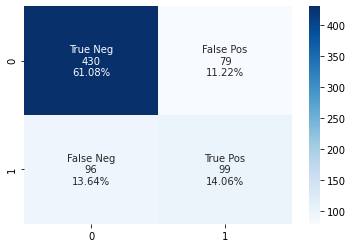

In [30]:
#Perhitungan Confusion Matrix
cfm = confusion_matrix(temp_y_test[ind], y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues')